# House Price Model (All Features Used)

## Cleaning Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
import plotly.express as px
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
#from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
print(len(train.keys())-2)
print(len(test.keys())-1)

79
79


In [9]:
house = pd.concat([train.iloc[:, range(1,80)], test.iloc[:, range(1,80)]]) 
house = house.reset_index(drop=True)

In [11]:
np.sum(house.isna().sum())

15707

<BarContainer object of 34 artists>

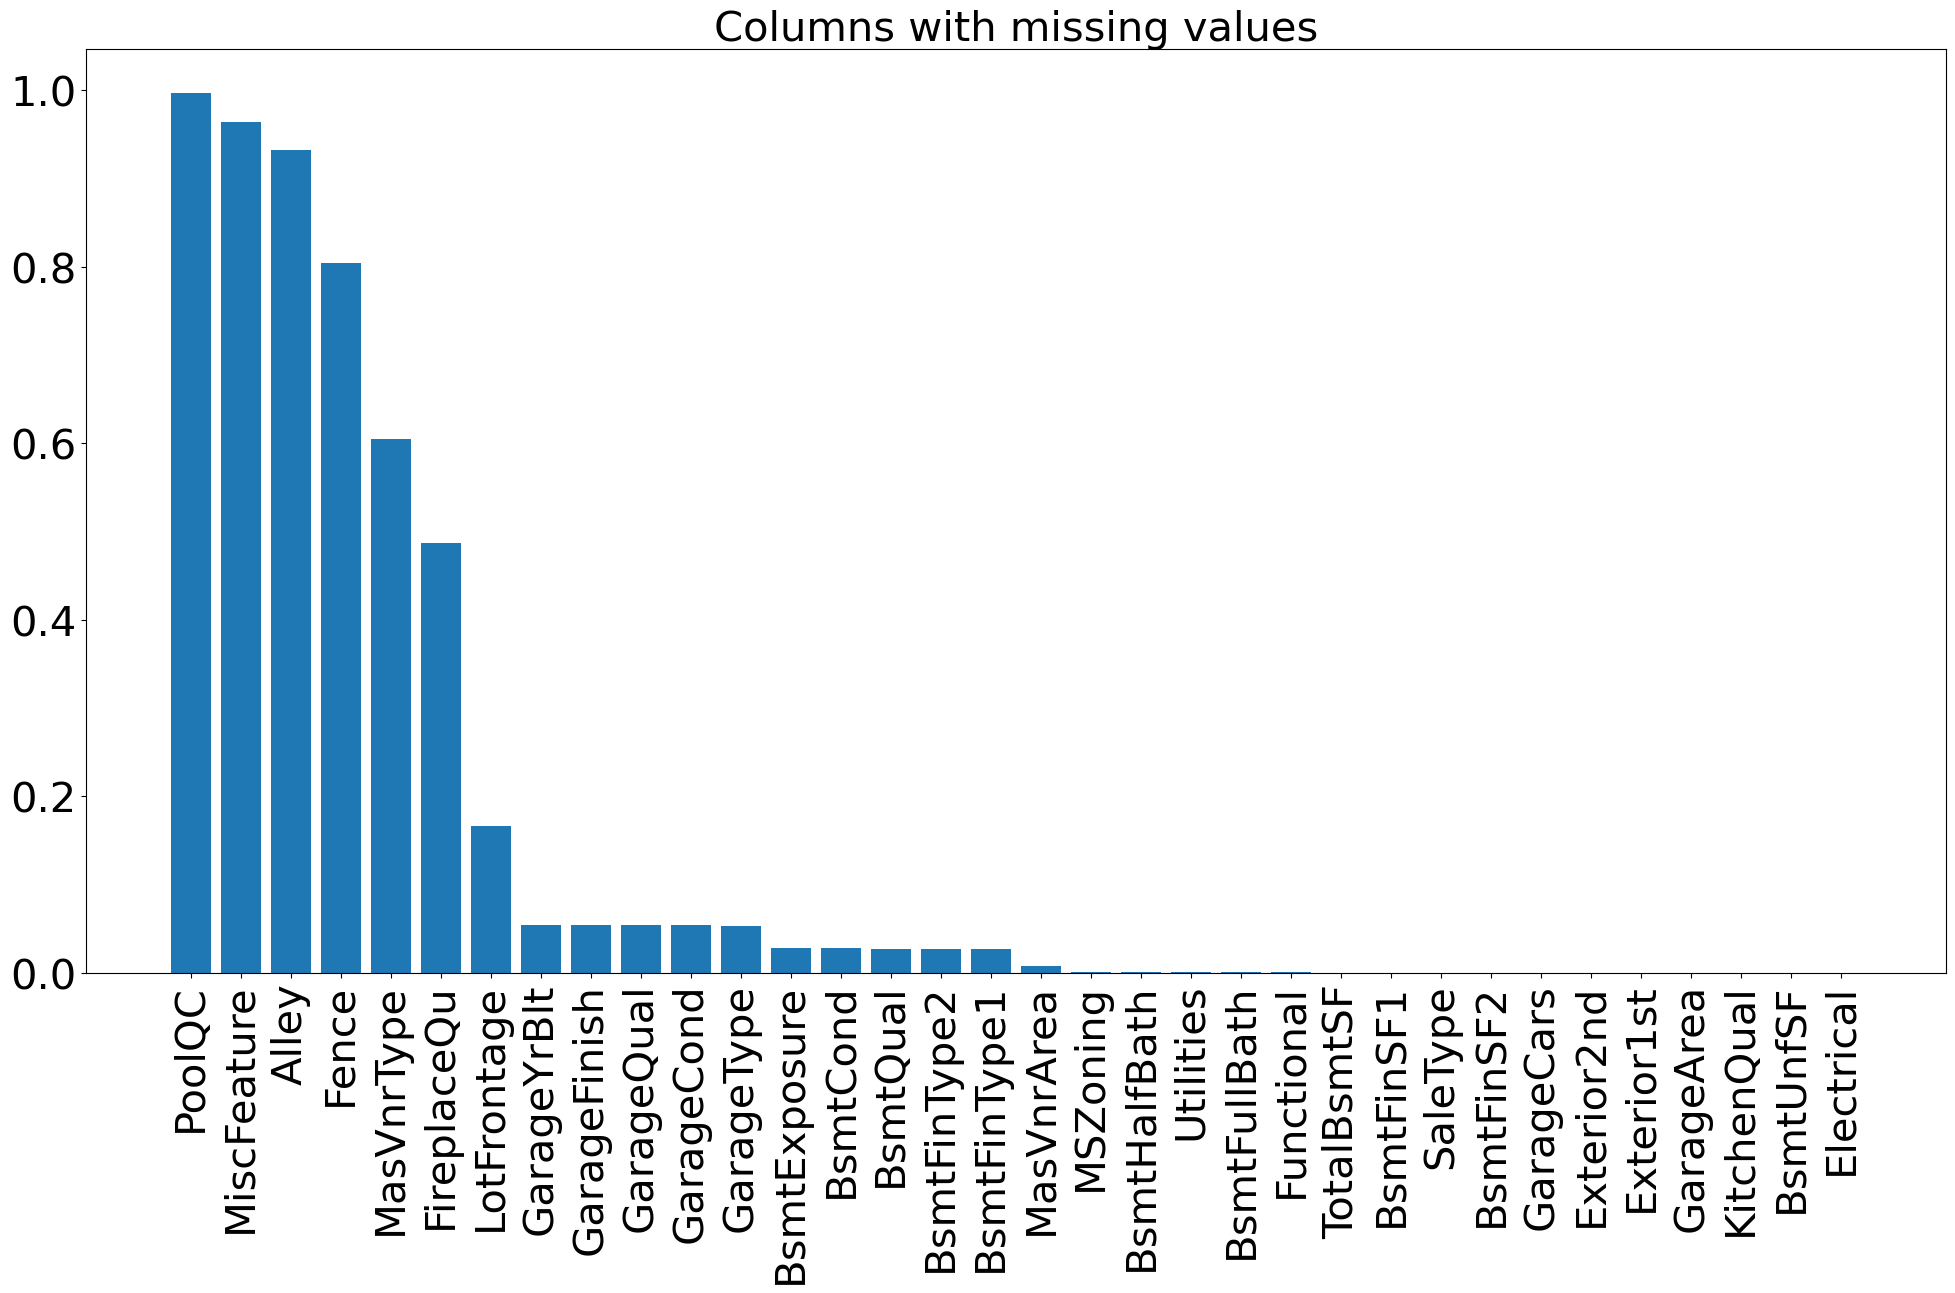

In [13]:
missings = house.isna().sum()/2919
missings = missings.sort_values(ascending=False)
missings = missings[missings != 0]

plt.figure(figsize=(24,12))
plt.title("Columns with missing values", fontsize=30)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.bar(missings.index, missings)

In [15]:
print(missings)
print(type(missings))

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
MasVnrType      0.605002
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
Utilities       0.000685
BsmtFullBath    0.000685
Functional      0.000685
TotalBsmtSF     0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
BsmtFinSF2      0.000343
GarageCars      0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageArea      0.000343
KitchenQual     0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
dtype: float64
<class 'pandas.core.series.Series'>


In [17]:
print(missings.index)
print(missings.values)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'MSZoning',
       'BsmtHalfBath', 'Utilities', 'BsmtFullBath', 'Functional',
       'TotalBsmtSF', 'BsmtFinSF1', 'SaleType', 'BsmtFinSF2', 'GarageCars',
       'Exterior2nd', 'Exterior1st', 'GarageArea', 'KitchenQual', 'BsmtUnfSF',
       'Electrical'],
      dtype='object')
[9.96574169e-01 9.64028777e-01 9.32168551e-01 8.04385063e-01
 6.05001713e-01 4.86467968e-01 1.66495375e-01 5.44707091e-02
 5.44707091e-02 5.44707091e-02 5.44707091e-02 5.37855430e-02
 2.80918123e-02 2.80918123e-02 2.77492292e-02 2.74066461e-02
 2.70640630e-02 7.87941076e-03 1.37033231e-03 6.85166153e-04
 6.85166153e-04 6.85166153e-04 6.85166153e-04 3.42583076e-04
 3.42583076e-04 3.42583076e-04 3.42583076e-04 3.42583076e-04
 3.42583076e-04 3.4258

In [19]:
missing_cols = house.columns[house.isnull().any()].tolist()
print("Columns with missing values:")
print(missing_cols)
print(len(missing_cols))

Columns with missing values:
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
34


In [21]:
print(type(house["GarageYrBlt"]))
for i in house["GarageYrBlt"]:
    print(type(i))

<class 'pandas.core.series.Series'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<cla

In [23]:
def plot_feature(feature):
    saleprice = train["SalePrice"]
    feature = train[feature]
    plt.scatter(feature, saleprice)

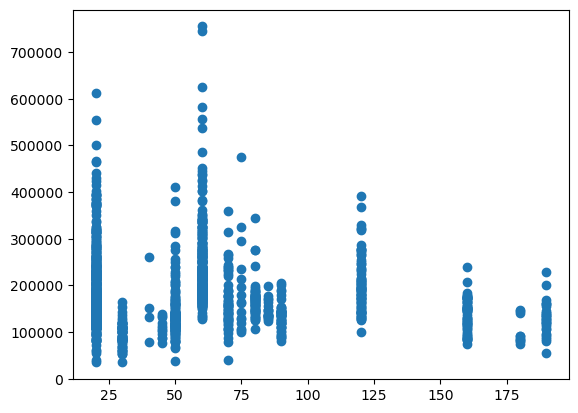

In [25]:
plot_feature("MSSubClass")

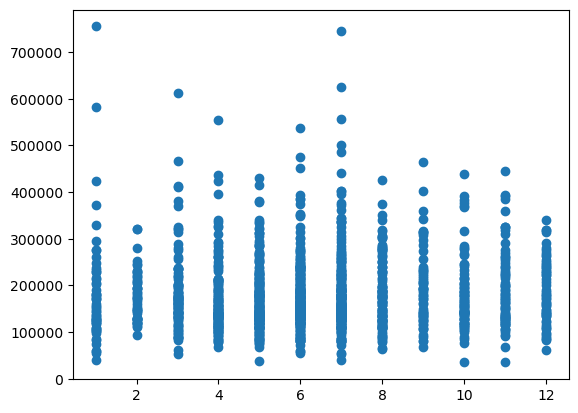

In [27]:
plot_feature("MoSold")

In [29]:
special_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", \
                "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", \
                "PoolQC", "Fence", "MiscFeature", "MasVnrType"]

for special_col in special_cols:
    house[special_col] = house[special_col].fillna("None")

house["MasVnrArea"] = house["MasVnrArea"].fillna(0)

house["GarageYrBlt"] = pd.to_numeric(house["GarageYrBlt"], errors='coerce')

house.loc[2592, "GarageYrBlt"] = 2007

house["MSSubClass"] = house["MSSubClass"].astype("category")
house["MoSold"] = house["MoSold"].astype("category")

house["GarageYrBlt"] = house["GarageYrBlt"].fillna(np.mean(house["GarageYrBlt"]))

house["GarageCars"] = house["GarageCars"].fillna(0)
house["GarageArea"] = house["GarageArea"].fillna(0)

house["BsmtFinSF1"] = house["BsmtFinSF1"].fillna(0)
house["BsmtFinSF2"] = house["BsmtFinSF2"].fillna(0)
house["BsmtUnfSF"] = house["BsmtUnfSF"].fillna(0)
house["TotalBsmtSF"] = house["TotalBsmtSF"].fillna(0)
house["BsmtFullBath"] = house["BsmtFullBath"].fillna(0)
house["BsmtHalfBath"] = house["BsmtHalfBath"].fillna(0)

house = house.drop(["MiscVal"],axis=1)

<BarContainer object of 9 artists>

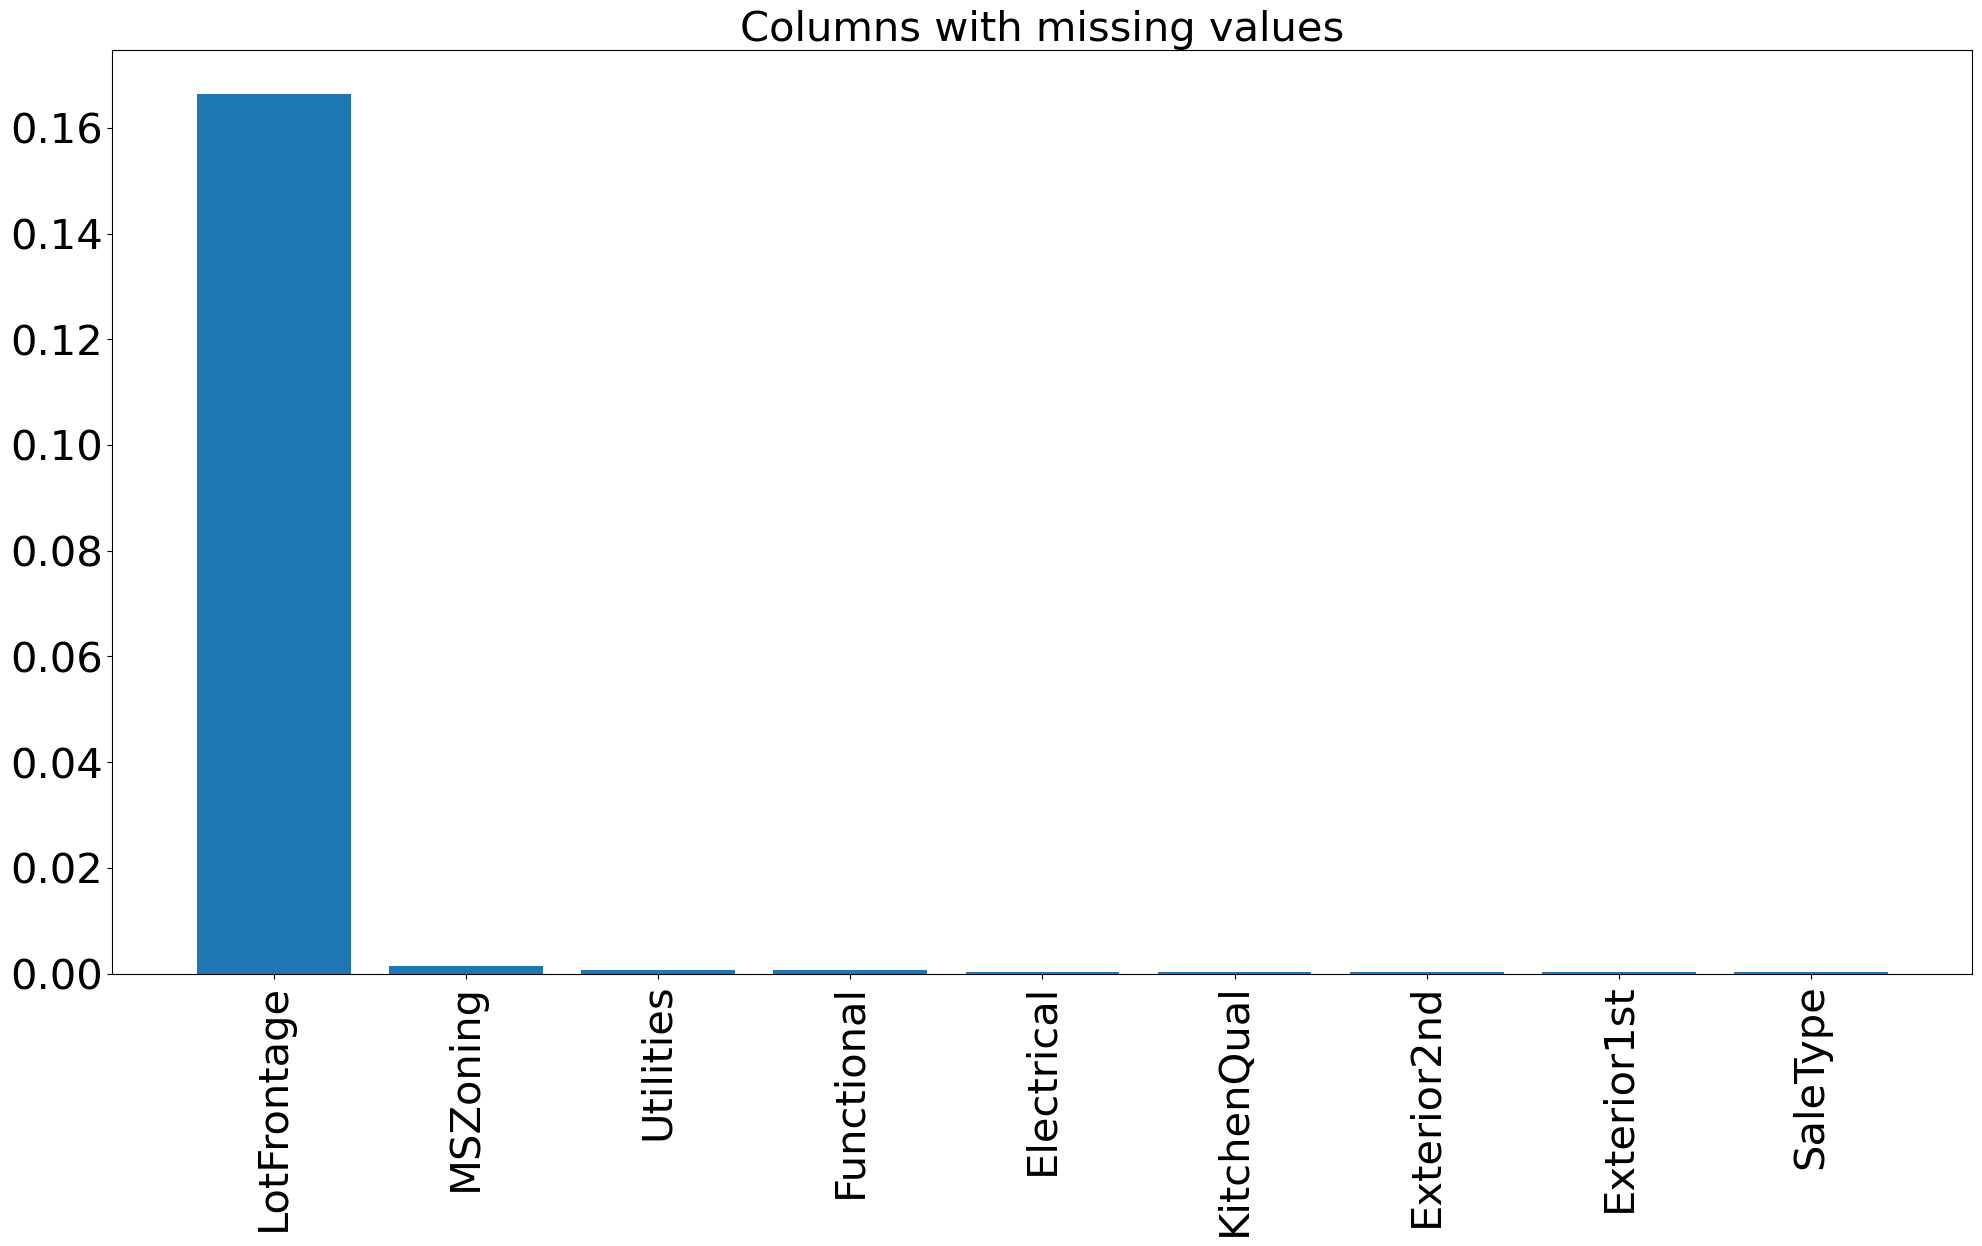

In [31]:
missings = house.isna().sum()/2919
missings = missings.sort_values(ascending=False)

missings = missings[missings != 0]

plt.figure(figsize=(24,12))
plt.title("Columns with missing values", fontsize=30)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.bar(missings.index, missings)

In [33]:
missing_cols = house.columns[house.isna().sum()>0]

for col in missing_cols:
    # for qualitative data
   if not pd.api.types.is_numeric_dtype(house[col]):
        house.loc[house[col].isna(), col] = house[col].mode()[0]

In [35]:
scaler = preprocessing.StandardScaler()
house_dummies = pd.get_dummies(house)

house_no_na = house_dummies[np.invert(house.isna().any(axis=1))]
house_na = house_dummies[house.isna().any(axis=1)]

notfrontage_train = scaler.fit_transform(np.asarray(house_no_na.drop(["LotFrontage"],axis=1)))
frontage_train = np.asarray(house_no_na["LotFrontage"])
notfrontage_test = scaler.fit_transform(np.asarray(house_na.drop(["LotFrontage"],axis=1)))

knn_model = KNeighborsRegressor(n_neighbors=1).fit(notfrontage_train, frontage_train)
frontage_pred = knn_model.predict(notfrontage_test)

house.loc[house["LotFrontage"].isna(), "LotFrontage"] = frontage_pred

In [37]:
np.sum(house.isna().sum())

0

## Qualitative to Quantitative

In [40]:
# LotShape - 0,1,2,3 : IR3,IR2,IR1,Reg
mp = {"IR3":0,"IR2":1,"IR1":2,"Reg":3}
house["LotShape"] = house["LotShape"].map(mp)

# LandSlope - 0,1,2 : Gtl,Mod,Sev
mp = {"Gtl":0,"Mod":1,"Sev":2}
house["LandSlope"] = house["LandSlope"].map(mp)

# ExterQual - 0,1,2,3,4 : Po,Fa,TA,Gd,Ex
mp = {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["ExterQual"] = house["ExterQual"].map(mp)

# ExterCond - 0,1,2,3,4 : Po,Fa,TA,Gd,Ex
mp = {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["ExterCond"] = house["ExterCond"].map(mp)

# BsmtQual - 0,1,2,3,4,5 : None,Po,Fa,TA,Gd,Ex
mp = {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["BsmtQual"] = house["BsmtQual"].map(mp)

# BsmtCond - 0,1,2,3,4,5 : None,Po,Fa,TA,Gd,Ex
mp = {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["BsmtCond"] = house["BsmtCond"].map(mp)

# BsmtFinType1 - 0,1,2,3,4,5,6 : None,Unf,LwQ,Rec,BLQ,ALQ,GLQ
mp = {"None":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}
house["BsmtFinType1"] = house["BsmtFinType1"].map(mp)

# BsmtExposure - 0,1,2,3,4,5 : None,Po,No,Mn,Av,Gd
mp = {"None":0,"Po":1,"No":2,"Mn":3,"Av":4,"Gd":5}
house["BsmtExposure"] = house["BsmtExposure"].map(mp)

# HeatingQC - 0,1,2,3,4 : Po,Fa,TA,Gd,Ex
mp = {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["HeatingQC"] = house["HeatingQC"].map(mp)

# KitchenQual - 0,1,2,3,4 : Po,Fa,TA,Gd,Ex
mp = {"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["KitchenQual"] = house["KitchenQual"].map(mp)

# FireplaceQu - 0,1,2,3,4,5 : NA,Po,Fa,TA,Gd,Ex
mp = {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["FireplaceQu"] = house["FireplaceQu"].map(mp)

# GarageFinish - 0,1,2,3 : NA,Unf,RFn,Fin
mp = {"None":0,"Unf":1,"RFn":2,"Fin":3}
house["GarageFinish"] = house["GarageFinish"].map(mp)

# GarageQual - 0,1,2,3,4,5 : NA,Po,Fa,TA,Gd,Ex
mp = {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["GarageQual"] = house["GarageQual"].map(mp)

# GarageCond - 0,1,2,3,4,5 : NA,Po,Fa,TA,Gd,Ex
mp = {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["GarageCond"] = house["GarageCond"].map(mp)

# PoolQC - 0,1,2,3,4 : NA,Fa,TA,Gd,Ex
mp = {"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4}
house["PoolQC"] = house["PoolQC"].map(mp)

In [42]:
# Create a DataFrame 'D' with training data rows from 'house'
D = house.loc[np.arange(0, train.shape[0], 1),]

# Create a DataFrame 'D_test' with test data rows from 'house'
D_test = house.loc[np.arange(train.shape[0], train.shape[0] + test.shape[0]), :].copy()

# Add the 'SalePrice' column from the training data to 'D'
D["SalePrice"] = train["SalePrice"]

In [44]:
print(D_test)
print()
print(D)
print()
print(D["SalePrice"])

     MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
1460         20       RH         80.0    11622   Pave  None         3   
1461         20       RL         81.0    14267   Pave  None         2   
1462         60       RL         74.0    13830   Pave  None         2   
1463         60       RL         78.0     9978   Pave  None         2   
1464        120       RL         43.0     5005   Pave  None         2   
...         ...      ...          ...      ...    ...   ...       ...   
2914        160       RM         21.0     1936   Pave  None         3   
2915        160       RM         21.0     1894   Pave  None         3   
2916         20       RL        160.0    20000   Pave  None         3   
2917         85       RL         62.0    10441   Pave  None         3   
2918         60       RL         74.0     9627   Pave  None         3   

     LandContour Utilities LotConfig  ...  3SsnPorch ScreenPorch PoolArea  \
1460         Lvl    AllPub    Inside  ...     

In [46]:
house = pd.get_dummies(house, drop_first=True)

## Standardization

In [49]:
house = pd.DataFrame(scaler.fit_transform(house), columns=house.columns)

In [51]:
train_filled = house.loc[np.arange(0,train.shape[0],1),]
train_filled["SalePrice"] = train["SalePrice"]
test_filled = house.loc[train.shape[0]:,]
test_filled = test_filled.reset_index(drop=True)

In [53]:
print(train_filled)
print()
print(test_filled)

      LotFrontage   LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0       -0.187571 -0.217879  0.701900   -0.21626     0.646183    -0.507284   
1        0.483081 -0.072044  0.701900   -0.21626    -0.063185     2.188279   
2       -0.053441  0.137197 -1.052249   -0.21626     0.646183    -0.507284   
3       -0.411122 -0.078385 -1.052249   -0.21626     0.646183    -0.507284   
4        0.661922  0.518903 -1.052249   -0.21626     1.355551    -0.507284   
...           ...       ...       ...        ...          ...          ...   
1455    -0.321702 -0.285470  0.701900   -0.21626    -0.063185    -0.507284   
1456     0.706632  0.381311  0.701900   -0.21626    -0.063185     0.391237   
1457    -0.142861 -0.142806  0.701900   -0.21626     0.646183     3.086800   
1458    -0.053441 -0.057207  0.701900   -0.21626    -0.772552     0.391237   
1459     0.259530 -0.029308  0.701900   -0.21626    -0.772552     0.391237   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  Sale

## XGBoost

In [56]:
X = np.asarray(train_filled.drop(["SalePrice"],axis=1))
y = np.vstack(np.log(np.asarray(train_filled["SalePrice"])))
truth = y.flatten()

In [58]:
print(X)

[[-0.18757134 -0.21787869  0.70189976 ... -0.12653513  0.46393674
  -0.30269297]
 [ 0.4830812  -0.07204408  0.70189976 ... -0.12653513  0.46393674
  -0.30269297]
 [-0.05344083  0.13719688 -1.05224869 ... -0.12653513  0.46393674
  -0.30269297]
 ...
 [-0.14286117 -0.14280557  0.70189976 ... -0.12653513  0.46393674
  -0.30269297]
 [-0.05344083 -0.057207    0.70189976 ... -0.12653513  0.46393674
  -0.30269297]
 [ 0.25953035 -0.0293082   0.70189976 ... -0.12653513  0.46393674
  -0.30269297]]


In [60]:
from xgboost import XGBRegressor

In [62]:
eda_model = XGBRegressor(n_estimators=500, max_depth=4, learning_rate=0.06)

eda_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

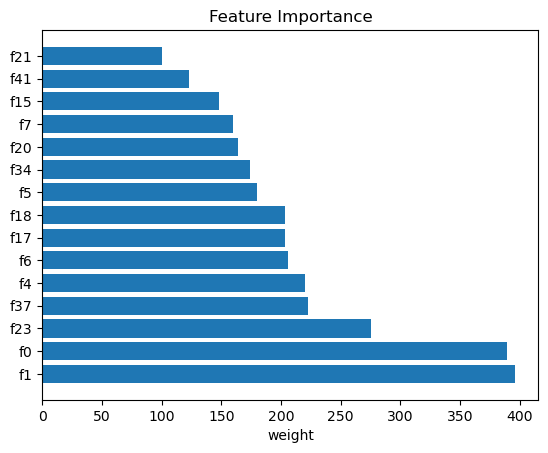

In [64]:
def feature_importance_plot(model, max_num_features=10, importance_type="weight"):
    importance = model.get_booster().get_score(importance_type=importance_type)
    features, scores = zip(*sorted(importance.items(), key=lambda x: x[1], reverse=True)[:max_num_features])
    
    plt.barh(features, scores)
    plt.xlabel(importance_type)
    plt.title('Feature Importance')
    plt.show()

feature_importance_plot(eda_model, max_num_features=15, importance_type="weight")

In [66]:
col_idx = [1,0,23,37,4,6,18,17,5,34,20,7,15,41,21]

list(train_filled.columns[col_idx])

['LotArea',
 'LotFrontage',
 'GrLivArea',
 'GarageArea',
 'OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'OverallCond',
 'GarageYrBlt',
 '1stFlrSF',
 'YearRemodAdd',
 'BsmtFinSF1',
 'OpenPorchSF',
 '2ndFlrSF']

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [70]:
xgb_grid = {"n_estimators": np.arange(900,1500,50),
            "max_depth": np.arange(2,5,1),
            "learning_rate": np.arange(0.02,0.11,0.04),
            "colsample_bytree": np.arange(0.02,0.12,0.02)}

xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, xgb_grid, cv=8)
xgb_cv.fit(X,y)

print(xgb_cv.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.1, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1450, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [78]:
import xgboost as xgb

In [80]:
X_train = train_filled.drop("SalePrice", axis=1)  
y_train = train_filled["SalePrice"]              

dtrain = xgb.DMatrix(X_train, label=y_train)

In [82]:
params = {'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None,
 'colsample_bynode': None, 'colsample_bytree': 0.1, 'device': None,
 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 
 'feature_types': None, 'gamma': None, 'grow_policy': None,
 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.02,
 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None,
 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None,
 'min_child_weight': None, 'missing': np.nan, 'monotone_constraints': None,
 'multi_strategy': None, 'n_estimators': 1450, 'n_jobs': None,
 'num_parallel_tree': None, 'objective': 'reg:squarederror', 'random_state': None,
 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 
 'scale_pos_weight': None, 'subsample': None, 'tree_method': None,
 'validate_parameters': None, 'verbosity': None}

model = xgb.train(
   params=params,
   dtrain=dtrain,
)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:45:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [84]:
print("Training columns:", len(train_filled.columns) - 1)
print("Test columns:", len(test_filled.columns))

Training columns: 239
Test columns: 239


In [86]:
print(test_filled)

      LotFrontage   LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0        0.483081  0.184371  0.701900   -0.21626    -0.772552     0.391237   
1        0.527791  0.519791 -1.052249   -0.21626    -0.063185     0.391237   
2        0.214820  0.464374 -1.052249   -0.21626    -0.772552    -0.507284   
3        0.393661 -0.024109 -1.052249   -0.21626    -0.063185     0.391237   
4       -1.171195 -0.654748 -1.052249   -0.21626     1.355551    -0.507284   
...           ...       ...       ...        ...          ...          ...   
1454    -2.154819 -1.043937  0.701900   -0.21626    -1.481920     1.289758   
1455    -2.154819 -1.049263  0.701900   -0.21626    -1.481920    -0.507284   
1456     4.059895  1.246808  0.701900   -0.21626    -0.772552     1.289758   
1457    -0.321702  0.034605  0.701900   -0.21626    -0.772552    -0.507284   
1458     0.214820 -0.068620  0.701900    3.80453     0.646183    -0.507284   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  Sale

## Ensemble (Attempt 1)

In [89]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [91]:
best_params = {
    'n_estimators': 1450,
    'max_depth': 3,
    'learning_rate': 0.02,
    'colsample_bytree': 0.1
}

num_models = 5
models = []

for i in range(num_models):
    X_resampled, y_resampled = resample(X, y, random_state=i) # Ensures randomness.
    # X_shuffled, y_shuffled = shuffle(X, y)
    model = xgb.XGBRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        colsample_bytree=best_params['colsample_bytree'],
        random_state=i  # Ensures randomness.
    )
    model.fit(X_resampled, y_resampled)
    models.append(model)
    print(len(X_resampled), len(y_resampled))

1460 1460
1460 1460
1460 1460
1460 1460
1460 1460


In [93]:
predictions = np.zeros((len(test_filled), num_models))

In [95]:
print(len(test_filled))

1459


In [97]:
print(predictions)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [99]:
# Loop through each model in the models list.
# 'model' is the model object itself.
for i, model in enumerate(models):
    # Use current model to predict values for all test samples.
    # 'model.predict(test_filled)' returns an array of predicted values.
    # Store these predicted values in the 'i'-th column of the 'predictions' array.
    predictions[:, i] = model.predict(test_filled)

In [101]:
# To check if all predictions are the same, or if they are different. Should be different.
for i, model in enumerate(models):
    individual_predictions = model.predict(test_filled)
    print(f"Predictions from Model {i}:")
    print(individual_predictions[:5])

Predictions from Model 0:
[11.719847 11.950097 12.166862 12.172814 12.211768]
Predictions from Model 1:
[11.750095 11.972202 12.157835 12.172494 12.171331]
Predictions from Model 2:
[11.736283  11.957013  12.184736  12.2046585 12.152137 ]
Predictions from Model 3:
[11.720296 11.987575 12.140485 12.195365 12.19685 ]
Predictions from Model 4:
[11.726972 11.96587  12.179935 12.183502 12.248691]


In [103]:
final_predictions = np.mean(predictions, axis=1) #'axis=1' ensures that columns are averaged.
final_predictions_original = np.exp(final_predictions) # Converts from logarithimic version to normal version.

In [105]:
print(final_predictions_original)
print(len(final_predictions_original))
print(type(final_predictions_original))

[124330.49552607 157400.91044603 192138.28220086 ... 172548.71266667
 123969.47461036 221510.11506457]
1459
<class 'numpy.ndarray'>


## Ensemble (Attempt 2)

The example code was used to fix the previous code. First, the example code uses eXterme Gradient Boosting, Light Gradient Boosting Machine and Catboost to generate three different models. Then, the example code generates another model, which takes the three different models, and averages their predictions to generate the final predictions.
- The main difference between the previous code and the example code is that the example code used three different techniques to create three different models; whereas, the previous code only used XGBoost to create different models.

In [112]:
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

In [114]:
# Functions will be used later in code, to see what error value the different models have.
# Will also check how averaging the different models impact the final model's error.

# Function that calculates the RMSE.
def RMSE(pred, truth):
    return np.sqrt(np.mean((pred-truth)**2))

# Function that performs cross validation and estimate error
def cv_scores(mod, X, y, cv=10):
    return -cross_val_score(mod, 
                                X, 
                                y, 
                                scoring="neg_root_mean_squared_error", 
                                cv=cv)

In [116]:
# Model 1: XGBoost

# Hyperparameter grid:
xgb_grid = {"n_estimators": np.arange(900,1500,50),
            "max_depth": np.arange(2,5,1),
            "learning_rate": np.arange(0.02,0.11,0.04),
            "colsample_bytree": np.arange(0.02,0.12,0.02)}

# Initialize model:
xgb = XGBRegressor()

# Fit the grid search:
xgb_cv = GridSearchCV(xgb, xgb_grid, cv=8)
xgb_cv.fit(X,y)

# Print the best estimator:
print(xgb_cv.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.1, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1450, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [121]:
# Checks the error using the cross validation function defined above.

xgb = XGBRegressor(n_estimators=950, max_depth=3, learning_rate=0.06, colsample_bytree = 0.1)
np.mean(cv_scores(xgb, X, y))

0.1195796194093978

In [123]:
# Model 2: Light Gradient Boosting Machine

# Hyperparameter grid:
lgb_grid = {"n_estimators": np.arange(800,1150,50),
            "max_depth": np.arange(2,5,1),
            "learning_rate": np.arange(0.02,0.12,0.04),
            "colsample_bytree": np.arange(0.1,0.6,0.1)}

# Initialize model:
lgb_mod = LGBMRegressor(verbose=-1)

# Fit the grid search:
lgb_cv = GridSearchCV(lgb_mod, lgb_grid, cv=8)
lgb_cv.fit(X,y.flatten())

# Print best estimator:
print(lgb_cv.best_estimator_)

LGBMRegressor(colsample_bytree=0.30000000000000004, learning_rate=0.02,
              max_depth=4, n_estimators=1100, verbose=-1)


In [126]:
# Checks the error using the cross validation function defined above.

lgb = LGBMRegressor(n_estimators=1100, max_depth=4, learning_rate=0.02, colsample_bytree = 0.3, verbose=-1)
np.mean(cv_scores(lgb, X, y.flatten()))

0.11961039236158802

In [126]:
# Model 3: CatBoost

# Hyperparameter grid:
cb_grid = {"iterations": np.arange(800,1200,100),
            "depth": np.arange(3,5,1),
            "learning_rate": np.arange(0.02,0.12,0.04),
            "colsample_bylevel": np.arange(0.02,0.12,0.02)}

# Initialize model:
cb_mod = CatBoostRegressor(verbose=0)

# Fit grid search:
cb_cv = GridSearchCV(cb_mod, cb_grid, cv=8)
cb_cv.fit(X,y.flatten())

# Print best estimator:
cb_cv.best_params_

{'colsample_bylevel': 0.08,
 'depth': 4,
 'iterations': 1100,
 'learning_rate': 0.06}

In [128]:
# Checks the error using the cross validation function defined above.

cb = CatBoostRegressor(iterations=1100, depth=4, learning_rate=0.06, colsample_bylevel = 0.1, verbose=0)
np.mean(cv_scores(cb, X, y.flatten()))

0.11978853936886022

In [130]:
# Final Model

estimators = [
    ("lgb", LGBMRegressor(n_estimators=1100, max_depth=4, learning_rate=0.02, colsample_bytree = 0.3, verbose=-1)),
    ("cb", CatBoostRegressor(iterations=1100, depth=4, learning_rate=0.06, colsample_bylevel = 0.1, verbose=0)),
    ("xgb", XGBRegressor(n_estimators=950, max_depth=3, learning_rate=0.06, colsample_bytree = 0.1))
]

mod = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Checks the error using the cross validation function defined above.
np.mean(cv_scores(mod, X, y.flatten()))

0.11737154561689193

In [132]:
# Fit the final model the training data
final_mod = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
final_mod.fit(X,y.flatten())

StackingRegressor(estimators=[('lgb',
                               LGBMRegressor(colsample_bytree=0.3,
                                             learning_rate=0.02, max_depth=4,
                                             n_estimators=1100, verbose=-1)),
                              ('cb',
                               <catboost.core.CatBoostRegressor object at 0x3506ad610>),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.1, device=None,
                                            early_stopping...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.06, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=950, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=LinearRegression())